In [36]:
!pip install numba
import numpy as np
import numba
import time
import matplotlib.pyplot as plt
import random

In [37]:
# lets test the sum function


n = 100

random_list = [random.randint(0,100) for _ in range(n)]
np_random_list = np.array(random_list)

@numba.njit()
def numba_np_sum(arr: np.array):
    return np.sum(arr)

print(numba_np_sum(np_random_list))

5057


In [42]:
runs = 1_000
raw_list = []
np_list = []
numba_list = []

for r in range(runs):
    s = time.time()
    for _ in range(int(10*r)):
        sum(random_list)
    e = time.time()
    raw_list.append(e - s)

for r in range(runs):
    s = time.time()
    for _ in range(int(10*r)):
        np.sum(np_random_list)
    e = time.time()
    np_list.append(e - s)

for r in range(runs):
    s = time.time()
    for _ in range(int(10*r)):
        numba_np_sum(np_random_list)
    e = time.time()
    numba_list.append(e - s)

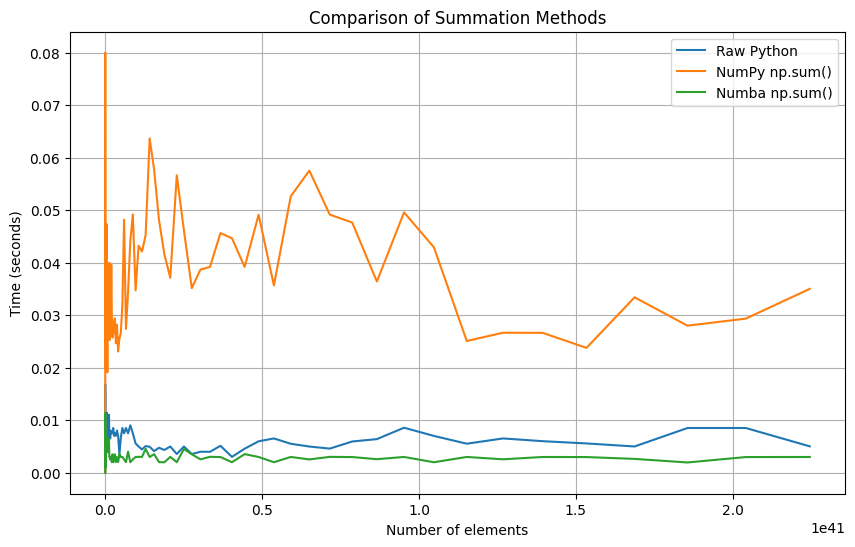

In [43]:
# Plotting
x = 1.1 ** np.arange(runs)

plt.figure(figsize=(10, 6))
plt.plot(x, raw_list, label='Raw Python')
plt.plot(x, np_list, label='NumPy np.sum()')
plt.plot(x, numba_list, label='Numba np.sum()')
plt.xlabel('Number of elements')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Summation Methods')
plt.legend()
plt.grid(True)
plt.show()